# Analisi tamponi

In [25]:
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [26]:
grid_shape=(7,3)

posizioni=np.array(range(grid_shape[0]*grid_shape[1]))

posizioni=np.reshape(posizioni,grid_shape)

grid_cell={}
for r in range(grid_shape[0]):
    for c in range(grid_shape[1]):
        grid_cell[posizioni[r,c]]=(r,c)

## Tamponi effettuati

### Nazionale

#### Ultimi 7 giorni

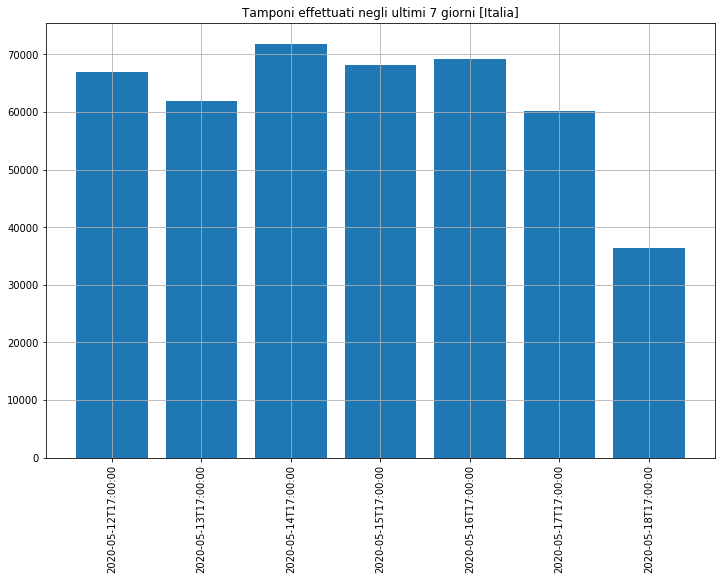

In [35]:
ultimi_giorni=7
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Tamponi effettuati negli ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['tamponi_giornalieri'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.show()

### Regionale

### Tamponi effettuati nell'ultima settimana nelle varie regioni

In [27]:
tamponi_ultima_sett=[np.sum(trend['tamponi_giornalieri'][r][-6:]) for r in regioni]

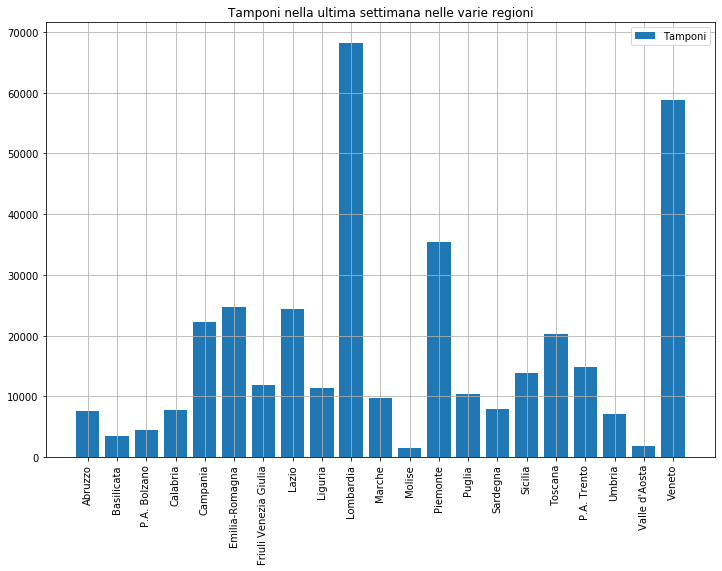

In [28]:
plt.figure(figsize=(12,8))
plt.title('Tamponi nella ultima settimana nelle varie regioni')
plt.bar(range(len(regioni)),tamponi_ultima_sett,label='Tamponi')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()

## Percentuale tamponi positivi

### Nazionale nel tempo

Percentuale attuale tamponi positivi:  1.24%


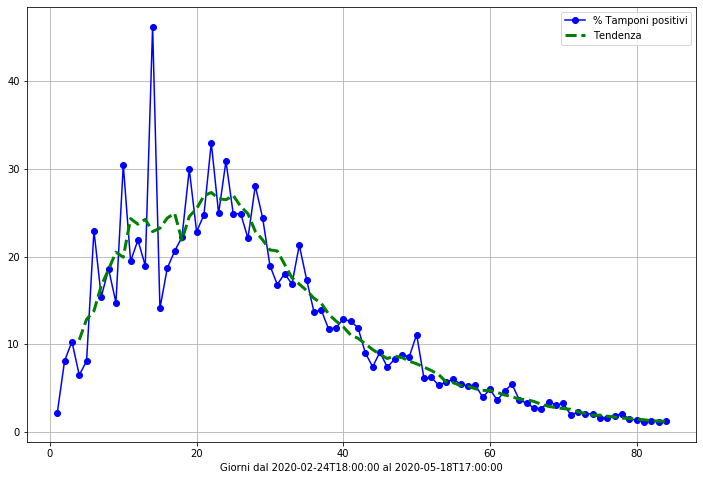

In [29]:
print('Percentuale attuale tamponi positivi: %5.2f%%'%trend['perc_tamponi_positivi']['Italia'][-1])

plt.figure(figsize=(12,8))
plt.plot(day_counter,trend['perc_tamponi_positivi']['Italia'],
         'bo-',
         label='% Tamponi positivi')
# metto anche la versione lisciata
plt.plot(day_counter,moving_function_rev1(trend['perc_tamponi_positivi']['Italia'],np.mean,3,3),
         'g--',
         label='Tendenza',linewidth=3)
plt.xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
plt.grid()
plt.legend()
plt.show()

### Nazionale ultimi 7 giorni

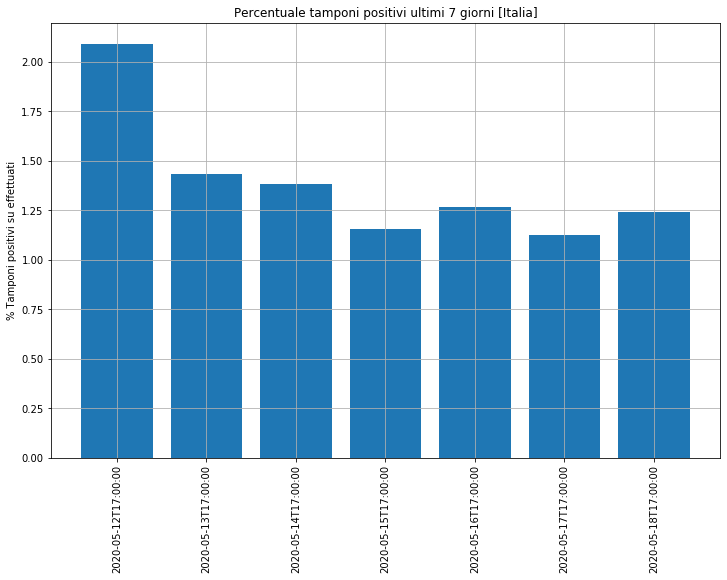

In [30]:
ultimi_giorni=7
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Percentuale tamponi positivi ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['perc_tamponi_positivi'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.ylabel('% Tamponi positivi su effettuati')
plt.show()

In [31]:
trend['perc_tamponi_positivi']['Italia'][-14:]

array([1.94524365, 2.24701617, 1.99121648, 2.08075265, 1.56568504,
       1.55191764, 1.82621502, 2.09244362, 1.43288206, 1.38015471,
       1.15729876, 1.2648347 , 1.12310943, 1.23880679])

### Regionale nel tempo

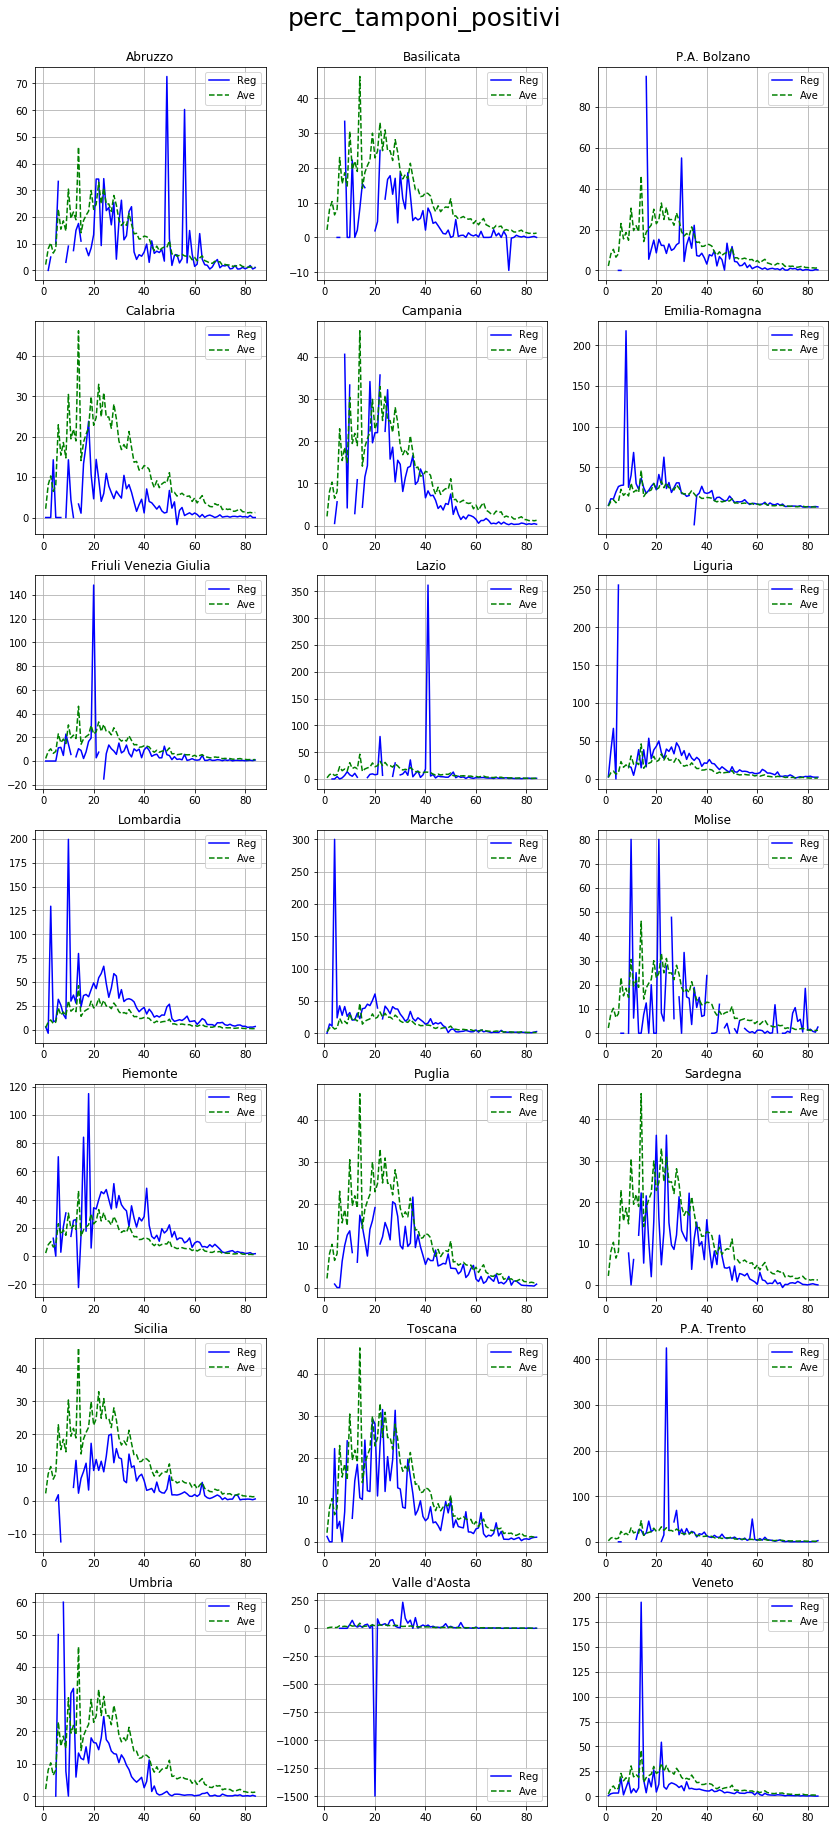

In [32]:
# percentuale tamponi positivi nel tempo nelle varie regioni

indicatori_selected=['perc_tamponi_positivi']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=(12,25))
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore][regione],'b-',label='Reg')
        ax[grid_cell[i][0],grid_cell[i][1]].set_title(regione)
        # plotto anche media italiana
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore]['Italia'],'g--',label='Ave')
        ax[grid_cell[i][0],grid_cell[i][1]].legend()
        ax[grid_cell[i][0],grid_cell[i][1]].grid()

### Percentuale tamponi positivi nelle varie regioni

#### Odierna (media ultimi 2 giorni)

**Media** dei tamponi positivi in percentuale su quelli effettuati negli ultimi (2) giorni nelle varie regioni.

In [33]:
actual_perc_pos=[np.nanmean(trend['perc_tamponi_positivi'][r][-2:]) for r in regioni]

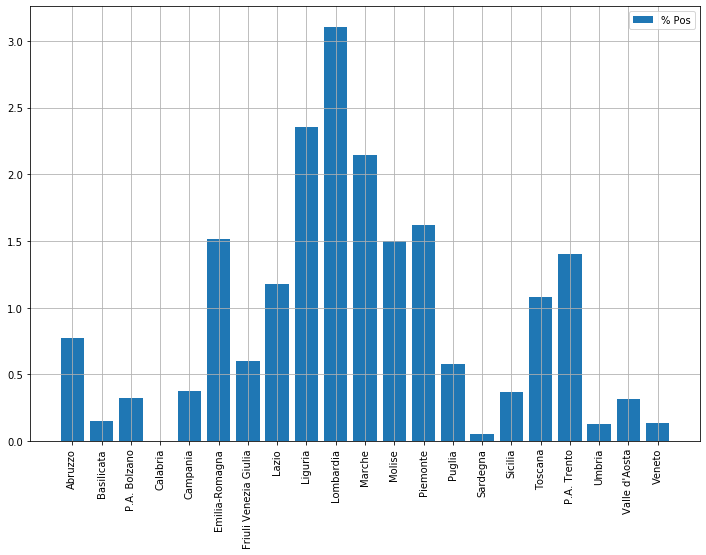

In [34]:
plt.figure(figsize=(12,8))
plt.bar(range(len(regioni)),actual_perc_pos,label='% Pos')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()